In [10]:
import pandas as pd
import numpy as np
from scipy.stats import mode as mode
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv(r'C:\Users\HI\Documents\vineel\train.csv')

In [12]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [13]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
data.shape

(614, 13)

# To check Missing Value

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Method 1    for numerical values where values are not in continuously increasing or decreasing order

In [18]:
data['Credit_History'].replace(np.NaN, mode(data['Credit_History']).mode[0], inplace=True)

In [19]:
data['Credit_History'].isnull().sum()

0

In [20]:
# Method 2     for numerical value where values are not in continuously increasing or decreasing order

In [21]:
data['Loan_Amount_Term'].fillna(mode(data['Loan_Amount_Term']).mode[0], inplace = True)

In [22]:
data.Loan_Amount_Term.isnull().sum()

0

In [23]:
# Method 3    for categorical values

In [24]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [25]:
data['Self_Employed'].fillna('No', inplace=True)
data['Gender'].fillna('Male', inplace=True)
data['Married'].fillna('Yes', inplace=True)
data['Dependents'].fillna('0', inplace=True)
data['Property_Area'].fillna('Rural', inplace=True)

In [26]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
 # Method 3    for numerical value

In [28]:
#data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [29]:
# Method 4

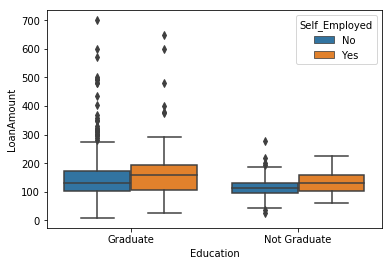

In [30]:
sns.boxplot(x='Education',y='LoanAmount', hue='Self_Employed', data=data)
plt.show()

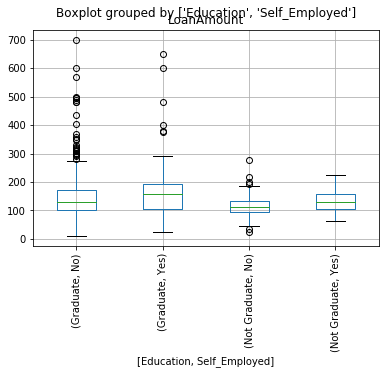

In [31]:
data.boxplot(column='LoanAmount', by=['Education','Self_Employed'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
table = data.pivot_table(values='LoanAmount', index='Self_Employed',columns='Education',
                         aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

#  Removal of any Symbol 

In [47]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [48]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [123]:
data['Dependents'].replace('\+', '', regex=True, inplace = True)

In [124]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

# Data Exploration

Data Frame Navigation

In [15]:
data.shape

(614, 13)

In [126]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [127]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [129]:
data.index

RangeIndex(start=0, stop=614, step=1)

In [130]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [131]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [67]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [139]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,NaN,N


Categorical Value Exploration

In [141]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        1
Loan_Status          0
dtype: int64

In [134]:
data['Property_Area'].fillna('Rural' , inplace = True)

In [135]:
data['Property_Area'].value_counts()

Semiurban    232
Urban        202
Rural        180
Name: Property_Area, dtype: int64

In [82]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [69]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [70]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [71]:
data['Education'].value_counts() 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [72]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

Numerical Value Exploration

In [73]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.764658,342.410423,0.855049
std,6109.041673,2926.248369,84.145700,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [74]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565940,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.188128,-0.059383,0.011134
LoanAmount,0.565940,0.188128,1.000000,0.038536,-0.000630
Loan_Amount_Term,-0.046531,-0.059383,0.038536,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000630,-0.004705,1.000000


In [75]:
# Scatter Plot

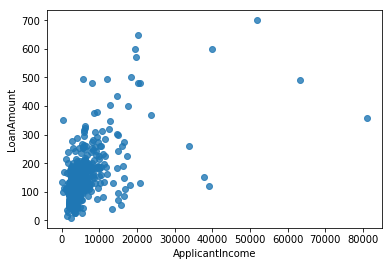

In [76]:
sns.regplot(x=data["ApplicantIncome"], y=data["LoanAmount"], fit_reg=False)
plt.show()

In [77]:
# Correlation via Visualization

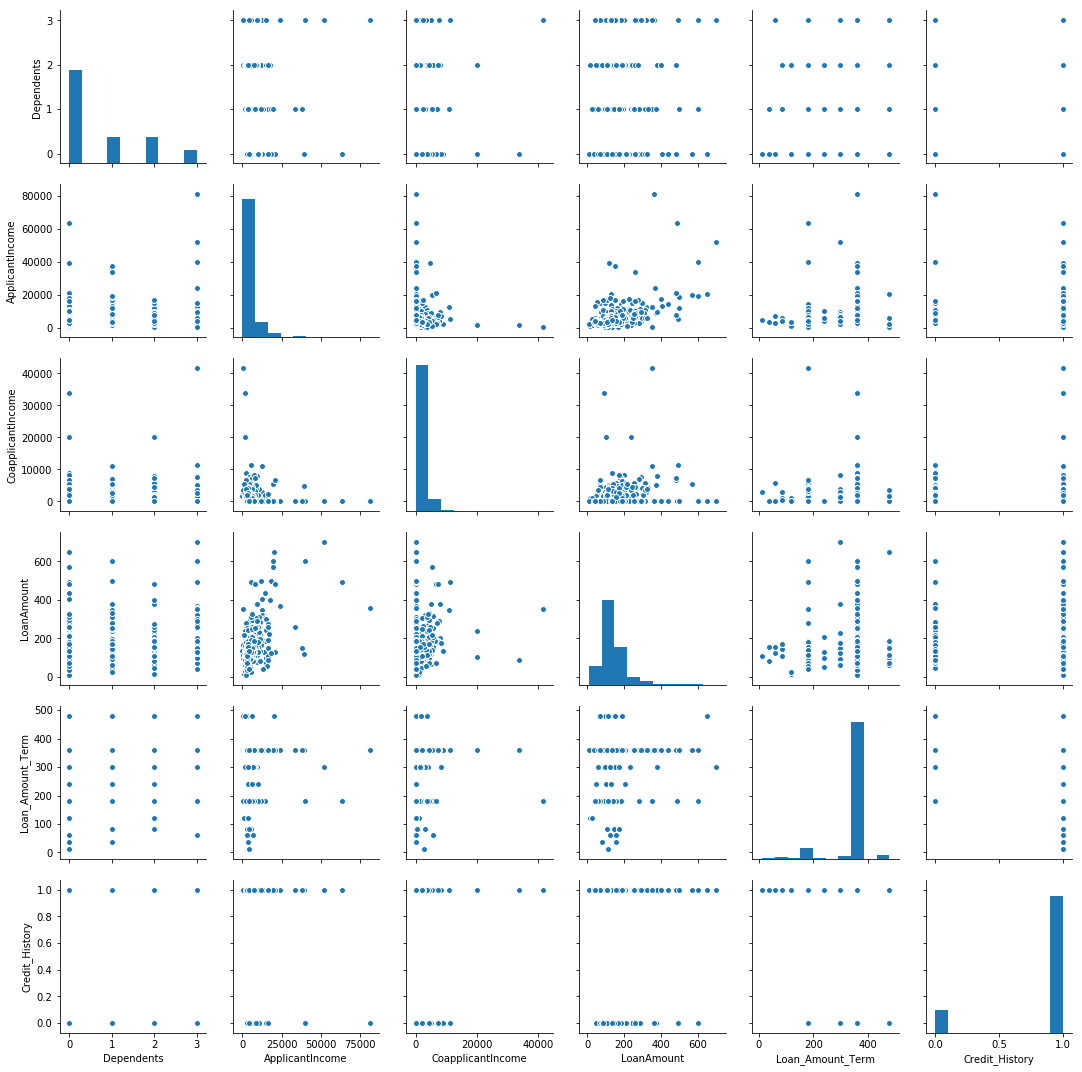

In [78]:
# Basic correlogram
sns.pairplot(data)
plt.show()

AttributeError: 'str' object has no attribute 'conjugate'

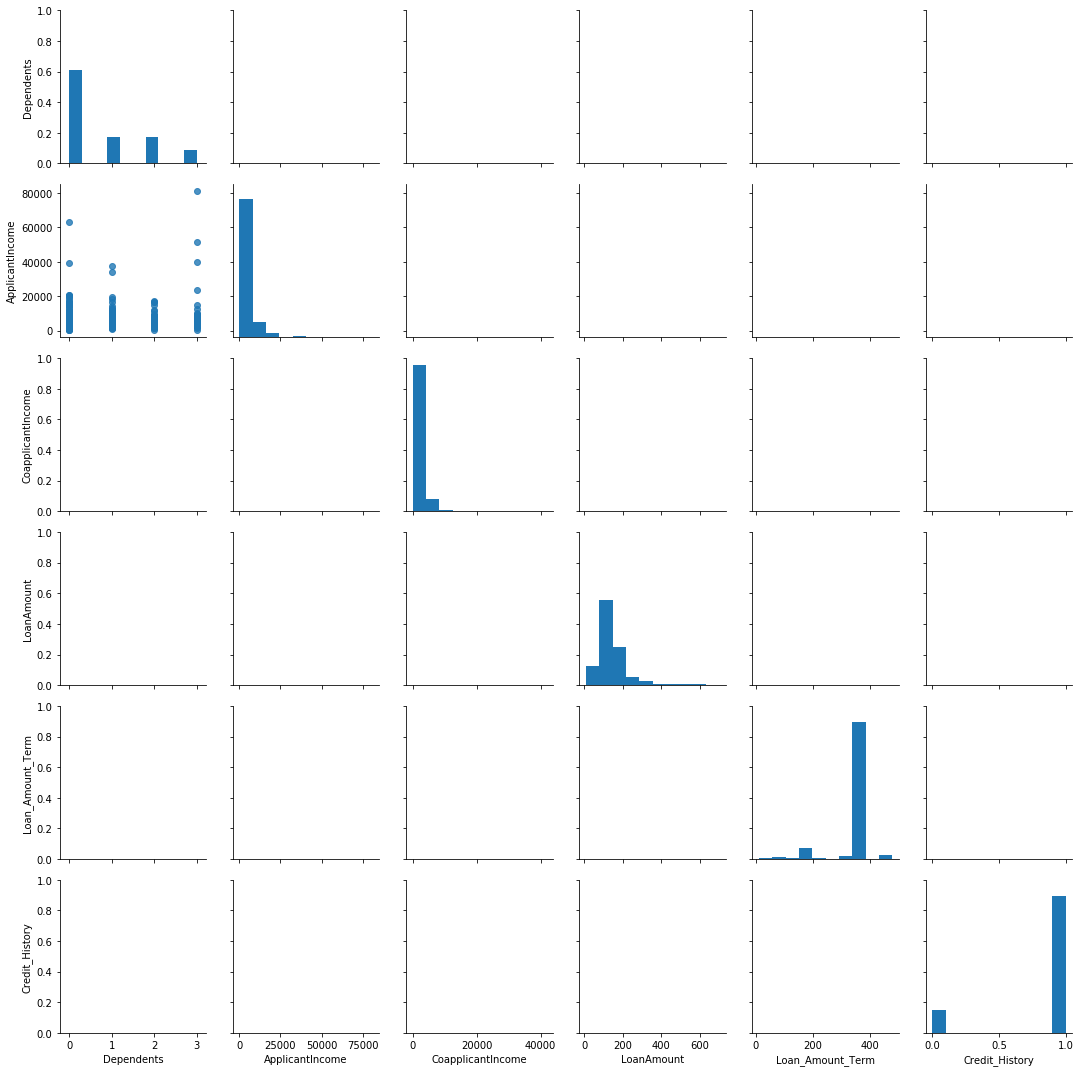

In [142]:
# with regression
sns.pairplot(data, kind="reg")
plt.show()

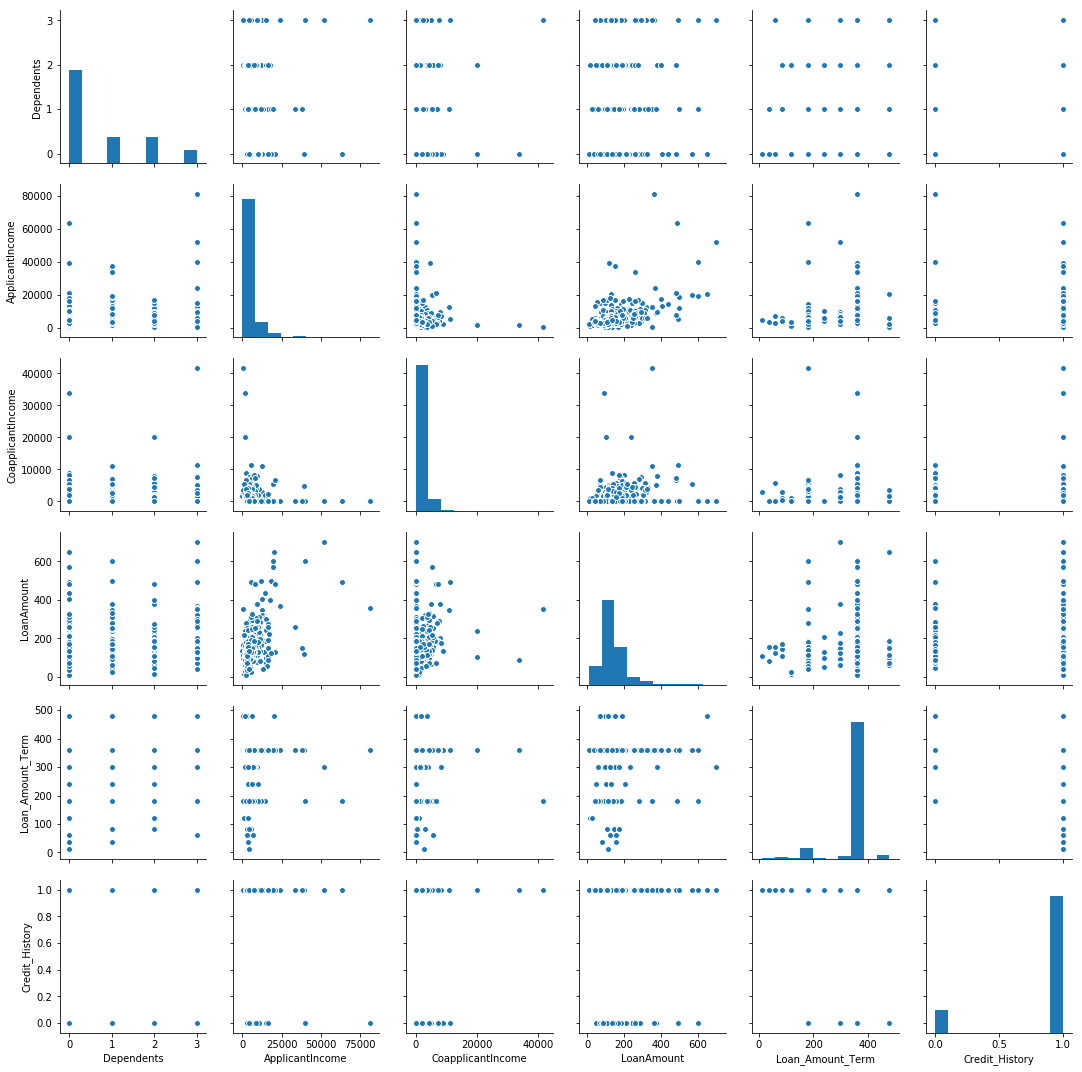

In [72]:
# without regression
sns.pairplot(data, kind="scatter")
plt.show()


Few more tips for DATA EXPLORATION

In [50]:
# How to apply multiple filter criteria to a pandas DataFrame

In [51]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [52]:
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


In [53]:
movies[movies.duration>=200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [54]:
movies[(movies.duration>=200) & (movies.genre=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [55]:
movies[(movies.duration>=200) | (movies.genre=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
27,8.6,The Silence of the Lambs,R,Drama,118,"[u'Jodie Foster', u'Anthony Hopkins', u'Lawren..."


In [56]:
movies[(movies.genre=='Crime') | (movies.genre=='Drama') | (movies.genre=='Action')]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


In [57]:
movies[movies.genre.isin(['Crime','Drama','Action'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


# How to  use string methods in pandas

In [58]:
orders = pd.read_csv('http://bit.ly/chiporders' , sep='\t')

In [59]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [60]:
# to make col values in upper case

In [62]:
orders.item_name.str.upper()

0                CHIPS AND FRESH TOMATO SALSA
1                                        IZZE
2                            NANTUCKET NECTAR
3       CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                                CHICKEN BOWL
5                                CHICKEN BOWL
6                               SIDE OF CHIPS
7                               STEAK BURRITO
8                            STEAK SOFT TACOS
9                               STEAK BURRITO
10                        CHIPS AND GUACAMOLE
11                       CHICKEN CRISPY TACOS
12                         CHICKEN SOFT TACOS
13                               CHICKEN BOWL
14                        CHIPS AND GUACAMOLE
15      CHIPS AND TOMATILLO-GREEN CHILI SALSA
16                            CHICKEN BURRITO
17                            CHICKEN BURRITO
18                                CANNED SODA
19                               CHICKEN BOWL
20                        CHIPS AND GUACAMOLE
21                           BARBA

In [204]:
# for filter/search

In [63]:
orders[orders.item_name.str.contains('Chicken')]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",$8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",$8.49
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$8.75
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",$10.98
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",$8.49


In [164]:
# to replace special characters

In [64]:
orders.choice_description.str.replace('[','')

0                                                     NaN
1                                             Clementine]
2                                                  Apple]
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5       Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                     NaN
7       Tomatillo Red Chili Salsa, Fajita Vegetables, ...
8       Tomatillo Green Chili Salsa, Pinto Beans, Chee...
9       Fresh Tomato Salsa, Rice, Black Beans, Pinto B...
10                                                    NaN
11      Roasted Chili Corn Salsa, Fajita Vegetables, R...
12      Roasted Chili Corn Salsa, Rice, Black Beans, C...
13      Fresh Tomato Salsa, Fajita Vegetables, Rice, C...
14                                                    NaN
15                                                    NaN
16      Tomatillo-Green Chili Salsa (Medium), Pinto Be...
17      Fresh 

In [65]:
orders.choice_description.str.replace('[','').str.replace(']','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5       Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                     NaN
7       Tomatillo Red Chili Salsa, Fajita Vegetables, ...
8       Tomatillo Green Chili Salsa, Pinto Beans, Chee...
9       Fresh Tomato Salsa, Rice, Black Beans, Pinto B...
10                                                    NaN
11      Roasted Chili Corn Salsa, Fajita Vegetables, R...
12      Roasted Chili Corn Salsa, Rice, Black Beans, C...
13      Fresh Tomato Salsa, Fajita Vegetables, Rice, C...
14                                                    NaN
15                                                    NaN
16      Tomatillo-Green Chili Salsa (Medium), Pinto Be...
17      Fresh 

In [66]:
# with regular expression

In [68]:
orders.choice_description.str.replace('[\[\]]','')

0                                                     NaN
1                                              Clementine
2                                                   Apple
3                                                     NaN
4       Tomatillo-Red Chili Salsa (Hot), Black Beans, ...
5       Fresh Tomato Salsa (Mild), Rice, Cheese, Sour ...
6                                                     NaN
7       Tomatillo Red Chili Salsa, Fajita Vegetables, ...
8       Tomatillo Green Chili Salsa, Pinto Beans, Chee...
9       Fresh Tomato Salsa, Rice, Black Beans, Pinto B...
10                                                    NaN
11      Roasted Chili Corn Salsa, Fajita Vegetables, R...
12      Roasted Chili Corn Salsa, Rice, Black Beans, C...
13      Fresh Tomato Salsa, Fajita Vegetables, Rice, C...
14                                                    NaN
15                                                    NaN
16      Tomatillo-Green Chili Salsa (Medium), Pinto Be...
17      Fresh 

# missing value treatment by drop

In [207]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [208]:
ufo.shape

(18241, 5)

In [173]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [174]:
ufo.dropna(how='any').shape

(2486, 5)

In [175]:
ufo.dropna(how='all').shape

(18241, 5)

In [176]:
ufo.dropna(subset=['City','Shape Reported'], how ='any').shape

(15576, 5)

In [177]:
ufo.dropna(subset=['City','Shape Reported'], how ='all').shape

(18237, 5)

In [178]:
ufo['Shape Reported'].value_counts()

LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
FLARE           1
PYRAMID         1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

In [179]:
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
FLARE           1
PYRAMID         1
DOME            1
HEXAGON         1
Name: Shape Reported, dtype: int64

# How to make  pandas DataFrame smaller and faster

In [180]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [181]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [182]:
drinks.info(memory_usage='deep')  # it check object column to check memory consumption

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.4 KB


In [183]:
drinks.memory_usage()   # to check memory usage of each column in bytes

Index                             80
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [184]:
drinks.memory_usage(deep = True)   # actual size  in bytes

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [185]:
""" int are more space efficient than strings"""

' int are more space efficient than strings'

In [186]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [187]:
drinks['continent'] = drinks.continent.astype('category')

In [188]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [189]:
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [190]:
drinks.memory_usage(deep=True)

Index                              80
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [191]:
drinks['country'] = drinks.country.astype('category')

In [192]:
drinks.memory_usage(deep=True)

Index                              80
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [193]:
"""every country was a different strings, so here we created 193 different categories,
previously it was 193 strings, now we are storing 193 int, which are small but it points to
a lookup table of 193 strings, so we are spending more memory than before to store the same thing
therefore use category datatypeonly when you have a object column of strings that only has a
few different values"""

'every country was a different strings, so here we created 193 different categories,\npreviously it was 193 strings, now we are storing 193 int, which are small but it points to\na lookup table of 193 strings, so we are spending more memory than before to store the same thing\ntherefore use category datatypeonly when you have a object column of strings that only has a\nfew different values'